# Import
---

In [61]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

# Data
---

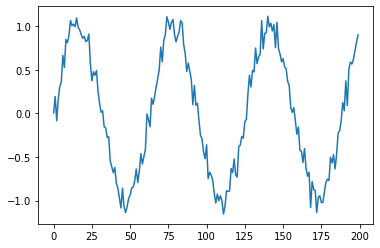

In [62]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1
plt.plot(series)

In [63]:
# Shape must be N x T x D, where:
#                                N is the number of samples
#                                T is the length of our sequence
#                                D is the number of features

T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, D)  # first parameter is axis
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape)

(190, 10, 1) (190,)


In [64]:
print(X.shape[1:])

(10, 1)


# Model
---

Epoch 1/80
6/6 [==============================] - 0s 29ms/step - loss: 0.8873 - val_loss: 0.7144
Epoch 2/80
6/6 [==============================] - 0s 5ms/step - loss: 0.3927 - val_loss: 0.0942
Epoch 3/80
6/6 [==============================] - 0s 5ms/step - loss: 0.1452 - val_loss: 0.0540
Epoch 4/80
6/6 [==============================] - 0s 5ms/step - loss: 0.0607 - val_loss: 0.0820
Epoch 5/80
6/6 [==============================] - 0s 5ms/step - loss: 0.0673 - val_loss: 0.0299
Epoch 6/80
6/6 [==============================] - 0s 5ms/step - loss: 0.0299 - val_loss: 0.0404
Epoch 7/80
6/6 [==============================] - 0s 6ms/step - loss: 0.0289 - val_loss: 0.0275
Epoch 8/80
6/6 [==============================] - 0s 6ms/step - loss: 0.0260 - val_loss: 0.0305
Epoch 9/80
6/6 [==============================] - 0s 6ms/step - loss: 0.0227 - val_loss: 0.0250
Epoch 10/80
6/6 [==============================] - 0s 5ms/step - loss: 0.0216 - val_loss: 0.0280
Epoch 11/80
6/6 [=====================

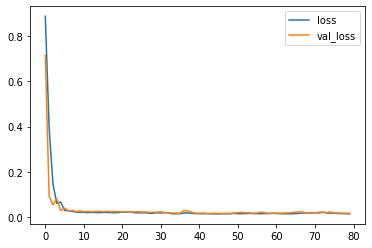

In [65]:
# Build
i = Input(shape=X.shape[1:])
x = SimpleRNN(5, activation=None)(i)
x = Dense(1)(x)

model = Model(i, x)

# Compile
model.compile(optimizer=Adam(learning_rate=0.1),
              loss='mse',
              )

# Train
r = model.fit(X[:-N//2], Y[:-N//2],
              epochs=80,
              validation_data=(X[-N//2:], Y[-N//2:]), batch_size=16)

# Plot
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

# Predictions
---

In [66]:
# Setlf-forecasting
validation_target = Y[-N//2:]
validation_predictions = []

# Last train input
last_x = X[-N//2]  # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0, 0]  # 1x1 array -> scalar

  # Update the predictions list
  validation_predictions.append(p)

  # Make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

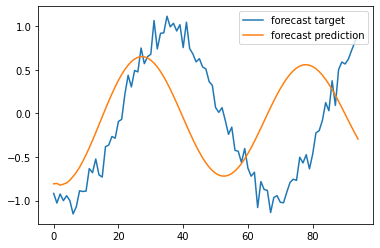

In [67]:
# Plot predictions
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()